#  Preparación de los datos


[IBM dice](https://www.ibm.com/cloud/blog/ibm-data-catalog-data-scientists-productivity) : *80 percent of a data scientist’s valuable time is spent simply finding, cleansing, and organizing data, leaving only 20 percent to actually perform analysis.*

Los datos incorrectos o inconsistentes conducen a conclusiones falsas. Así que antes de empezar a trabajar con ellos debemos asegurarnos que los entendemos y tienen calidad suficiente para trabajar por ellos.


# Calidad de los datos

Vamos a revisar que criterios de calidad debemos exigir a nuestros datos:

* **Validez:** El grado en que los datos se ajustan a ciertas reglas o restricciones definidas.

* **Exactitud:** El grado en que los datos están cerca de los valores verdaderos. Si bien la definición de todos los valores válidos posibles permite detectar fácilmente valores no válidos, no significa que sean precisos.

* **Completitud:** El grado en que se conocen todos los datos requeridos. 

* **Uniformidad:** El grado en que se especifican los datos utilizando la misma unidad de medida o una unidad de medida comparable.


# Análisis de los datos


Podemos dividir el análisis de nuestro conjunto de datos en tres pasos destinados a producir datos de *calidad* con los criterios anteriormente mencionados.

* **Inspección**: detecta datos inesperados, incorrectos e inconsistentes.
* **Limpieza**: corrige o elimina las anomalías descubiertas.
* **Verificación**: después de la limpieza, los resultados se inspeccionan para verificar la corrección.

## Inspección

La inspección de los datos puede llevar mucho tiempo y requiere el uso de diversos métodos para explorar los datos de los que disponemos. 

Éstos son algunos de ellos:

### Realizar perfiles de los datos

Un resumen estadístico sobre los datos, llamado perfil de datos, es una herramienta útil para obtener una idea general sobre estos.

Por ejemplo, se debe verificar si una columna en particular se ajusta a estándares o patrones particulares. ¿La columna de datos se registra como un *string* o como un número?

¿Cuántos valores faltan? ¿Cuántos valores únicos hay en una columna y su distribución? ¿Este conjunto de datos está vinculado o tiene una relación con otro?

### Visualizaciones sobre estos

Al analizar y visualizar los datos utilizando métodos estadísticos como la media, la desviación estándar, el rango o los cuantiles, se pueden encontrar valores inesperados y, por lo tanto, erróneos.

Vale la pena investigar esos valores atípicos y descubrir que no siempre son necesariamente datos incorrectos.


### Software

La combinación de uno o más paquetes de software nos puede ser de gran ayuda para realizar este análisis. Nosotros en contreto usaremos la combinación de: pandas + matplotlib + seaborn para realizarlos.

In [1]:
# Importamos las librerias básicas necesarias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


[Kaggle NY Airbnb](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/)

In [23]:
# Necesitamos realizar un análisis inicial.
# Esto incluye conocer de cuantas observaciones y cuantas características disponemos.

df = pd.read_csv("data/AB_NYC_2019.csv")
print("Dimensiones:" + str(df.shape))


df.head()

Dimensiones:(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
# Vamos a ver los tipos de los datos con los que deberemos trabajar

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [30]:
#Finalmente una primera descripción de los datos de tipo numérico
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [150]:
# Es interesante saber si los datos en formato texto estan representando categorias 
# o corresponden a texto no formalmente construido
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [103]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [152]:
print(df["host_name"].unique())

len(df["host_name"].unique())

['John' 'Jennifer' 'Elisabeth' ... 'Abayomi' 'Alberth' 'Ilgar & Aysel']


11453

**Podemos  realizar diferentes visualizaciones de nuestros datos para obtener conocimiento sobre estos**


[Pandas Visualizations](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)


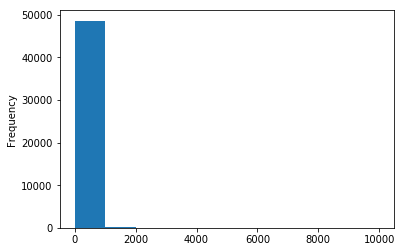

In [32]:
df["price"].plot(kind='hist');

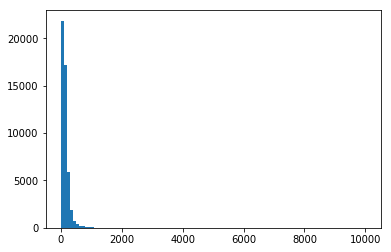

In [34]:
plt.hist(df.price, bins=100);

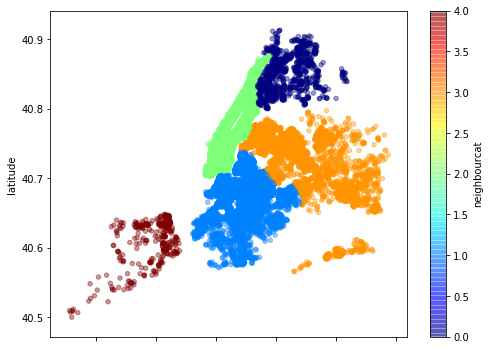

In [78]:
df["neighbourcat"] = df.neighbourhood_group.astype("category").cat.codes

viz_4=df.plot(kind='scatter', x='longitude', y='latitude', c='neighbourcat',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(8,6))


In [147]:
# Vamos a ver si tenemos grandes propietarios. 
top = df.host_id.value_counts()
top.head(10)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [153]:
# Que otras visualizaciones podrian ser de interés?


## Limpieza

La limpieza de datos involucra diferentes técnicas según el problema a solucionar y el tipo de datos que se esta tratando. 

En general, los datos incorrectos se eliminan, se corrigen o se etiquetan.

### Datos irrelevantes

Los datos irrelevantes son aquellos que realmente no se necesitan y no se ajustan al contexto del problema que estamos tratando de resolver.

Por ejemplo, si estuviéramos analizando datos sobre la salud general de la población, el número de teléfono no sería necesario. **Solamente debemos descartar** aquellos datos de los que estamos seguros que son irrelevantes.





In [28]:
# Usando pandas podemos eliminar las columnas / features que no nos interesen

df_clean = df.drop(['id','host_name'], axis=1)
df_clean.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Datos duplicados

Los duplicados son aquellas observaciones que se repiten en su conjunto de datos.

A menudo sucede cuando, por ejemplo:

   * Los datos se combinan de diferentes fuentes.
   * Errores del propio usuario.
     

Estos, simplemente deben eliminarse.


### Errores de tipo

En general cada tipo de datos tiene sus propios errores, vamos a describir los más comunes.

Es necesario asegurarse que los **números** estén almacenados como datos numéricos con el tipo adecuado.

Las **fechas** deben almacenarse como un objeto de tipo fecha y tener un formato único para todo el conjunto de datos.


También debemos tener en cuenta todos los errores que pueden derivarse del uso de ***strings* o texto en general**. La información en formato texto será una gran fuente de problemas, debemos pensar que la introducción de esta información no es *cerrada* y esto genera muchos errores.

* Información adicional antes, despues o entre palabras. Por ejemplo: espacios en blanco.
* Categorias con múltiples nombres que deben ser normalizadas. Por ejemplo: *Hombre, H, hombre, hmbre*. 
* Palabras que aportan información muy similar.

Muchas veces una visualización gráfica o un conteo de valores únicos por columna nos ayudará como se esta formada nuestra columna y detectar errores relacionados con el texto. Varias soluciones posibles pasan por *mapear* manualmente los diferentes valores a uno común, crear expresiones regulares para normalizarlos (p.ej pasar todas las letras a minúsculas) o crear funciones distancia para saber a cual de las categorias petenecen los distintos términos.


**Advertencia:** los valores que no se pueden convertir al tipo especificado deben convertirse al valor de *NA/NAN*. Esto indica que el valor es incorrecto y debe ser reparado.


### Estandarizado

Nuestro deber es no solo reconocer los errores tipográficos, sino también poner cada valor en el mismo formato estandarizado.

Para los *strings*, debemos asegurarnos que todos los valores estan en minúsculas o mayúsculas.

Para valores numéricos, debemos asegurarnos que todos los valores tengan una determinada unidad de medida. La altura, por ejemplo, puede ser en metros y centímetros. La diferencia de 1 metro se considera igual que la diferencia de 1 centímetro.



In [161]:
print(df.neighbourhood[:10])
print("-" * 100)
print(df.neighbourhood[:10].str.lower()) #upper / capitalize / title

0            Kensington
1               Midtown
2                Harlem
3          Clinton Hill
4           East Harlem
5           Murray Hill
6    Bedford-Stuyvesant
7        Hell's Kitchen
8       Upper West Side
9             Chinatown
Name: neighbourhood, dtype: object
----------------------------------------------------------------------------------------------------
0            kensington
1               midtown
2                harlem
3          clinton hill
4           east harlem
5           murray hill
6    bedford-stuyvesant
7        hell's kitchen
8       upper west side
9             chinatown
Name: neighbourhood, dtype: object



Una de las dudas recurrentes es como tratamos los datos categóricos. Muchos de los tutoriales que encontrareis os sugerirán que podeis transformarlos directamente en datos numéricos y eso es verdad si nuestros datos son binarios, de lo contrario podemos esstar dando más peso a las categorias con valores mas elevados.


In [162]:
#Vamos a transformar una categoria de texto a número

from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
X = labels.fit_transform(df.neighbourhood_group)
print(X[:100])


[1 2 2 1 2 2 1 2 2 2 2 2 1 2 2 1 1 2 1 2 1 1 1 1 1 1 2 2 2 2 2 2 1 2 1 1 1
 1 1 2 2 1 1 2 2 1 3 1 1 1 1 2 1 1 2 1 2 2 1 2 1 2 2 1 1 2 1 2 1 2 2 2 2 2
 1 2 2 3 1 2 1 2 2 1 2 1 1 2 2 1 1 1 1 1 1 1 2 2 2 1]


In [95]:
#Si estamos usando un dataset en formato matricial

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])

Y = onehotencoder.fit_transform(X.reshape(-1, 1)).toarray()
print(Y[:10,:])

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [99]:
#Si tenemos un dataset en pandas.

pd.get_dummies(df.neighbourhood_group).head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


### Escalado

Escalar significa transformar los datos para que se ajusten a una escala específica, como 0–100 o 0–1.

También puede ayudar a hacer que ciertos tipos de datos sean más fáciles de mostrar graficamente. Por ejemplo, podríamos querer reducir la asimetría para ayudar a dibujar (cuando se tienen tantos valores atípicos). Las funciones más utilizadas son log, raíz cuadrada e inversa.

El escalado también puede tener lugar en datos que tienen diferentes unidades de medida. Al escalar podemos comparar diferentes *features* de una manera más senzilla.




(array([4.3298e+04, 3.5710e+03, 1.2660e+03, 4.9900e+02, 1.4300e+02,
        6.7000e+01, 3.1000e+01, 1.2000e+01, 3.0000e+00, 5.0000e+00]),
 array([-0.52243321,  0.88945952,  2.30135225,  3.71324498,  5.12513771,
         6.53703044,  7.94892317,  9.3608159 , 10.77270863, 12.18460136,
        13.59649409]),
 <a list of 10 Patch objects>)

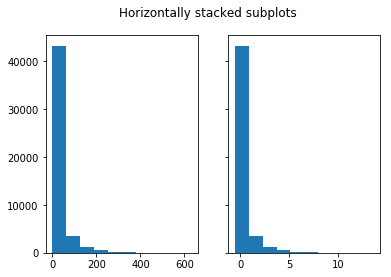

In [16]:
# Cómo escalamos?

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

n_reviews = df.number_of_reviews.values
n_reviews = n_reviews.astype(float)
transformed = sc_X.fit_transform(n_reviews.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Horizontally stacked subplots')


ax1.hist(n_reviews)
ax2.hist(transformed)


In [17]:
StandardScaler?

[Documentación StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

### Normalización

Si bien la normalización también reescala los valores en un rango de 0-1, la intención aquí es transformar los datos para que se distribuyan normalmente. ¿Por qué?

En la mayoría de los casos, normalizamos los datos si vamos a utilizar métodos estadísticos que se basan en datos distribuidos normalmente. 

[Enlace](https://en.wikipedia.org/wiki/Normalization_(statistics)#Examples)



In [ ]:
# Cómo normalizamos?

### Valores faltantes

Dado que los valores faltantes son inevitables, nos deja con la pregunta de qué hacer cuando los encontremos. Vamos a describir tres maneras de trabajar con ellos:


In [76]:
# Esto nos proporciona una lista con los datos faltantes de cada columna
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
neighbourcat                          0
dtype: int64


#### Uno: eliminar

Si los valores faltantes en una columna rara vez ocurren y ocurren al azar, entonces la solución más fácil y más directa es eliminar las observaciones (filas) que tienen valores faltantes.

Si faltan la mayoría de los valores de la columna y se producen al azar, entonces una decisión típica es descartar la columna completa.

Esto es particularmente útil al hacer análisis estadísticos, ya que completar los valores faltantes puede producir resultados inesperados o sesgados.

In [182]:
# Vamos a eliminar las filas sin nombre

df_no_id = df.drop(df[df["name"].isna()].index ,axis = 0)
df_no_id.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10042
reviews_per_month                 10042
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Dos. Imputar

Significa calcular el valor faltante basado en otras observaciones. Hay diferentes métodos para realizar esta tarea:

El **primer** método es usar valores estadísticos como media, mediana. Sin embargo, ninguno de estos garantiza datos imparciales, especialmente si faltan muchos valores.

La media es más útil cuando los datos originales no están sesgados, mientras que la mediana es más robusta, no sensible a los valores atípicos y, por lo tanto, se usa cuando pensamos que los datos están sesgados.

En un dato distribuido normalmente, uno puede obtener todos los valores que están dentro de 2 desviaciones estándar de la media. Luego, podemos completar los valores faltantes generando números aleatorios dentro de esta distribución.

Una **segunda** opción seria usando una regresión lineal. Con las base en los datos existentes, se puede calcular la mejor línea de ajuste entre dos variables muy correlacionadas, por ejemplo, precio de la vivienda versus su tamaño en m².

Vale la pena mencionar que los modelos de regresión lineal son sensibles a los valores atípicos.

[Documentación sklearn: Imputation](https://scikit-learn.org/stable/modules/impute.html)


En **tercer** lugar podemos copiar valores de otros registros similares. Esta aproximación solo es útil si tenemos suficientes datos disponibles, se puede aplicar tanto a datos numéricos y categóricos.

En la imputación secuencial,  la columna que contiene los valores faltantes se ordena de acuerdo con alguna de las otras variables para que los registros que tienen valores similares ocurran secuencialmente. A continuación, cada valor faltante se completa con el valor del siguiente registro disponible.

Lo que es más interesante es que también se puede utilizar la imputación del vecino más cercano, que se beneficia de la utilización de algoritmos de clustering para completar el valor faltante con el vecino más cercano al registro.


#### Tres. Etiquetar

Algunos argumentan que completar los valores faltantes conduce a una pérdida de información, sin importar el método de imputación que usemos.

Esto se debe a que decir que faltan los datos es informativo en sí mismo, y el algoritmo debería saberlo. De lo contrario, solo estamos reforzando el patrón que ya existe por otras características.

Esto es particularmente importante cuando los datos que faltan no ocurren al azar. Tomemos, por ejemplo, una encuesta realizada donde la mayoría de las personas de una raza específica se niegan a responder una determinada pregunta.

Los datos numéricos que faltan se pueden completar con, 0, pero estos ceros deben ignorarse al calcular cualquier valor estadístico o al trazar la distribución.

Si bien los datos categóricos se pueden completar con por ejemplo el valor "falta": una nueva categoría que indica que falta este dato.

**Debemos tomar en consideración**

Los valores faltantes no son los mismos que los valores predeterminados. Por ejemplo,el valor cero puede interpretarse como perdido o predeterminado, pero no como ambos.

Los valores faltantes no son "desconocidos". Una investigación realizada en la que algunas personas no recordaban si habían sido intimidadas o no en la escuela, debe tratarse y etiquetarse como desconocida y no faltante.

Cada vez que eliminamos o imputamos valores estamos perdiendo información. Entonces, la señalización podría venir al rescate.


### Valores atípicos: *outliers*

Son valores que son significativamente diferentes de todas las demás observaciones. Cualquier valor de datos que se encuentre a más de (1.5 * IQR) de los cuartiles Q1 y Q3 se considera un valor atípico.

Los valores atípicos son inocentes hasta que se demuestre lo contrario. Dicho esto, no deben eliminarse a menos que haya una buena razón para ello.

Por ejemplo, uno puede notar algunos valores extraños y sospechosos que es poco probable que ocurran, por lo que decide eliminarlos. Sin embargo, vale la pena investigar antes de eliminar.

También vale la pena mencionar que algunos modelos, como la regresión lineal, son muy sensibles a los valores atípicos. En otras palabras, los valores atípicos podrían arrojar el modelo desde donde se encuentra la mayoría de los datos.

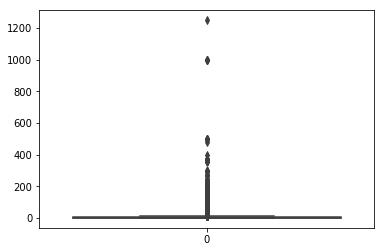

In [22]:
# Qué columnas tienen valores outliers? Vamos a  realizar observaciones gráficas mediante el uso de boxplot de seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# sns.boxplot(data=df.price);
sns.boxplot(data=df.minimum_nights);

# Verificación

Cuando hayamos terminado,  debemos verificar la corrección volviendo a inspeccionar los datos y asegurándonos que las reglas y restricciones se cumplan.

Por ejemplo, después de completar los datos que faltan, pueden violar cualquiera de las reglas y restricciones.

Podría implicar realizar alguna corrección manual.

#### Lecturas

* [Medium](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4)
* [Data cleaning](https://elitedatascience.com/data-cleaning)